# Visualisation of collected data

## 1. Introduction

The purpose if this notebook is to conduct statistics about our gathered data before proceeding to trainig the detector models. This step of visualising the statistics of our dataset is crucial for any machine learning model process, as a model is only as good as its data. 

This process will help us clarify annotation correctness, balance of dataset images, and structural properties of the dataset. This will also uncover any class imbalances, annotation errors, or wrongly bounded boxes and scales.



#### Import Libraries and load Annotations

In [16]:
import json
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pycocotools.coco import COCO
from pathlib import Path
import skimage.io as io


sns.set_theme(style="whitegrid")

# 1. Setup Paths (Using raw string 'r' to handle your backslashes safely)
base_path = Path(r"dataset_FULL_COCO/COCO-based_COCO")
ann_dir = base_path / "annotations"
img_dir = base_path / "images"

# 2. Load all splits into a dictionary
splits = ["train", "val", "test"]
coco_sets = {}



## 2. Dataset Overview

In [17]:
print("Loading datasets...")
for split in splits:
    json_path = ann_dir / f"{split}.json"
    
    if json_path.exists():
        #print(f"Loading {split} from {json_path.name}...")
        coco_sets[split] = COCO(str(json_path))
    else:
        print(f"[WARN] Could not find {json_path}")

# 3. Print Summary Stats
total_imgs = 0
total_anns = 0
print("\n=== Dataset Summary ===")
for split, coco in coco_sets.items():
    n_imgs = len(coco.getImgIds())
    n_anns = len(coco.getAnnIds())
    print(f"{split.upper():<6} : {n_imgs} images, {n_anns} annotations")
    total_imgs += n_imgs
    total_anns += n_anns

print("-" * 30)
print(f"TOTAL  : {total_imgs} images, {total_anns} annotations")

Loading datasets...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!

=== Dataset Summary ===
TRAIN  : 604 images, 800 annotations
VAL    : 133 images, 185 annotations
TEST   : 138 images, 175 annotations
------------------------------
TOTAL  : 875 images, 1160 annotations


## 3. Class Distribution

Plotting of distribution of instances across all 6 traffic sign classes.

In [18]:

# Initialize a dictionary to hold total counts for every category
# We use the first available COCO set to get the list of category names
first_coco = list(coco_sets.values())[0]
cat_ids = first_coco.getCatIds()
cat_names = [c['name'] for c in first_coco.loadCats(cat_ids)]

# Create a zero-filled dictionary for all categories
global_counts = {name: 0 for name in cat_names}

# Loop through every split (train, val, test) and sum up the annotations
for split, coco in coco_sets.items():
    for cat_id in cat_ids:
        # Get category name
        cat_name = coco.loadCats(cat_id)[0]['name']
        # Count annotations for this category in this split
        count = len(coco.getAnnIds(catIds=cat_id))
        # Add to global total
        global_counts[cat_name] += count

print("Global Counts:", global_counts)

Global Counts: {'Blind-Spot Mirror (Convex)': 198, 'No Entry (One Way)': 250, 'No Through Road (T-Sign)': 143, 'Pedestrian Crossing': 246, 'Roundabout Ahead': 178, 'Stop': 145}


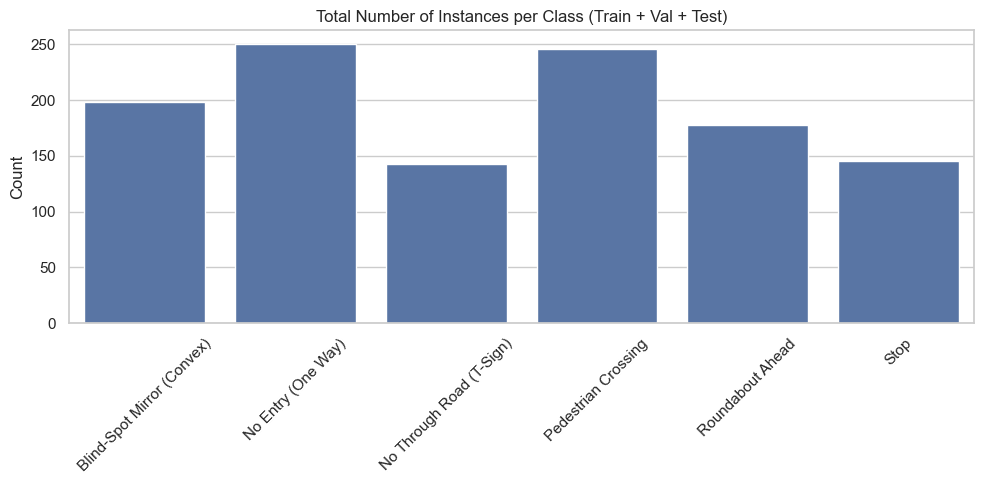

In [19]:
# --- Plot 1: Absolute Counts ---
plt.figure(figsize=(10, 5))
sns.barplot(x=list(global_counts.keys()), y=list(global_counts.values()))
plt.title("Total Number of Instances per Class (Train + Val + Test)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

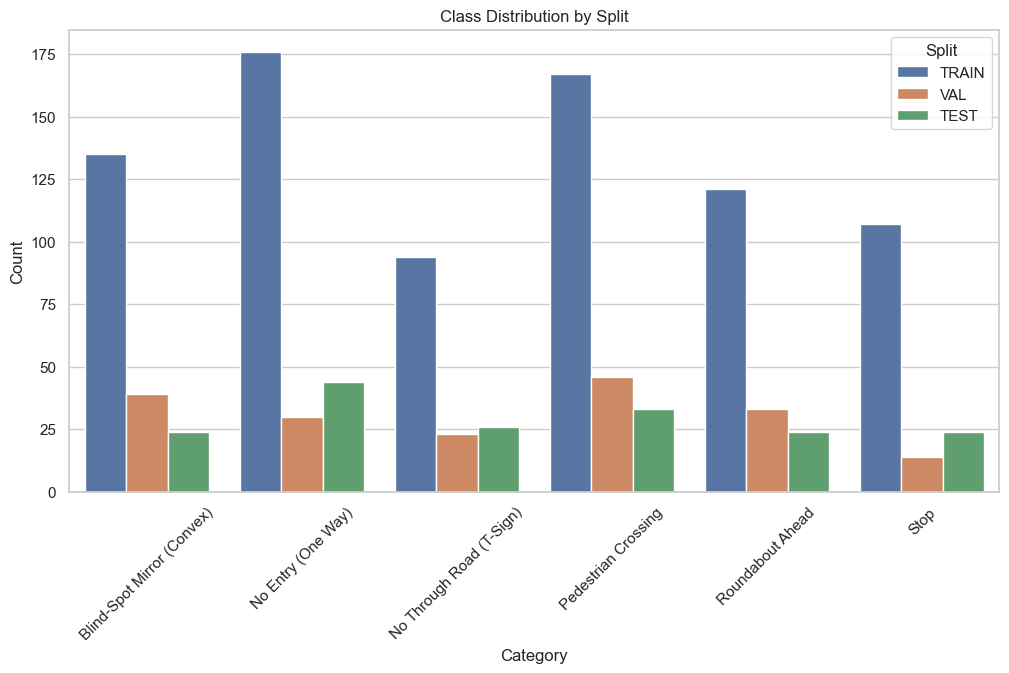

In [20]:
# Prepare data for a grouped DataFrame
data_list = []

for split, coco in coco_sets.items():
    for cat_id in cat_ids:
        cat_name = coco.loadCats(cat_id)[0]['name']
        count = len(coco.getAnnIds(catIds=cat_id))
        data_list.append({
            "Split": split.upper(),
            "Category": cat_name,
            "Count": count
        })

df = pd.DataFrame(data_list)

# Plot Grouped Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Category", y="Count", hue="Split")
plt.title("Class Distribution by Split")
plt.xticks(rotation=45)
plt.show()

Processing train...
Processing val...
Processing test...


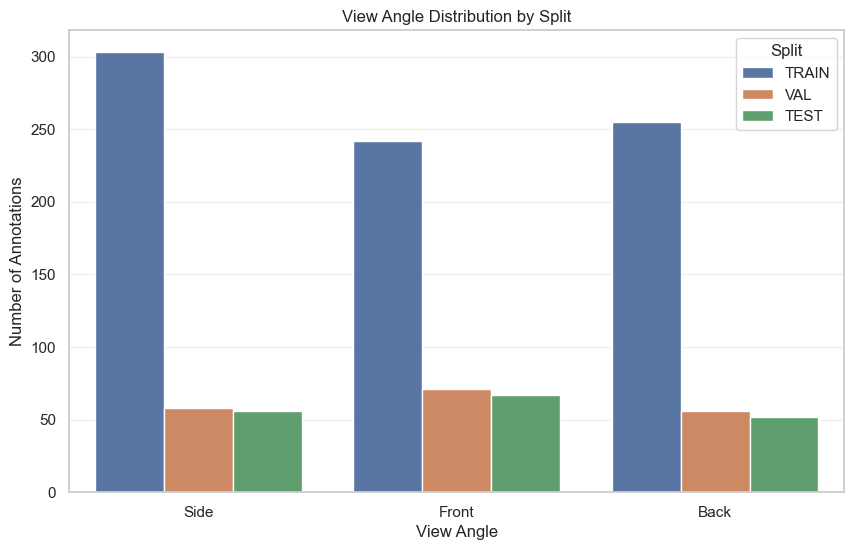

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# 1. Prepare data for the DataFrame
data_list = []

for split, coco in coco_sets.items():
    print(f"Processing {split}...")
    
    # We use a Counter to aggregate counts for this split first
    angle_counts = Counter()
    
    for ann in coco.anns.values():
        attrs = ann.get('attributes', {})
        va = attrs.get('view_angle', None)
        
        # Handle cases where Label Studio saves as list ["Front"] or string "Front"
        if va:
            if isinstance(va, list):
                angle_counts.update(va)
            else:
                angle_counts[va] += 1
    
    # Add the aggregated counts to our data list
    for angle, count in angle_counts.items():
        data_list.append({
            "Split": split.upper(),
            "View Angle": angle,
            "Count": count
        })

# 2. Create DataFrame
df_angles = pd.DataFrame(data_list)

# 3. Plot Grouped Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_angles, x="View Angle", y="Count", hue="Split")

plt.title("View Angle Distribution by Split")
plt.xlabel("View Angle")
plt.ylabel("Number of Annotations")
plt.grid(axis='y', alpha=0.3)
plt.show()

## 4. Attribute Distribution


Plotting of distrivution of instances of the 4 attributes.

Processing train...
Processing val...
Processing test...


C:\Users\matth\AppData\Local\Temp\ipykernel_24304\2189418049.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counter.keys()), y=list(counter.values()), ax=ax, palette=color_palette)
C:\Users\matth\AppData\Local\Temp\ipykernel_24304\2189418049.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counter.keys()), y=list(counter.values()), ax=ax, palette=color_palette)
C:\Users\matth\AppData\Local\Temp\ipykernel_24304\2189418049.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counter.keys()), y=list(counter.values

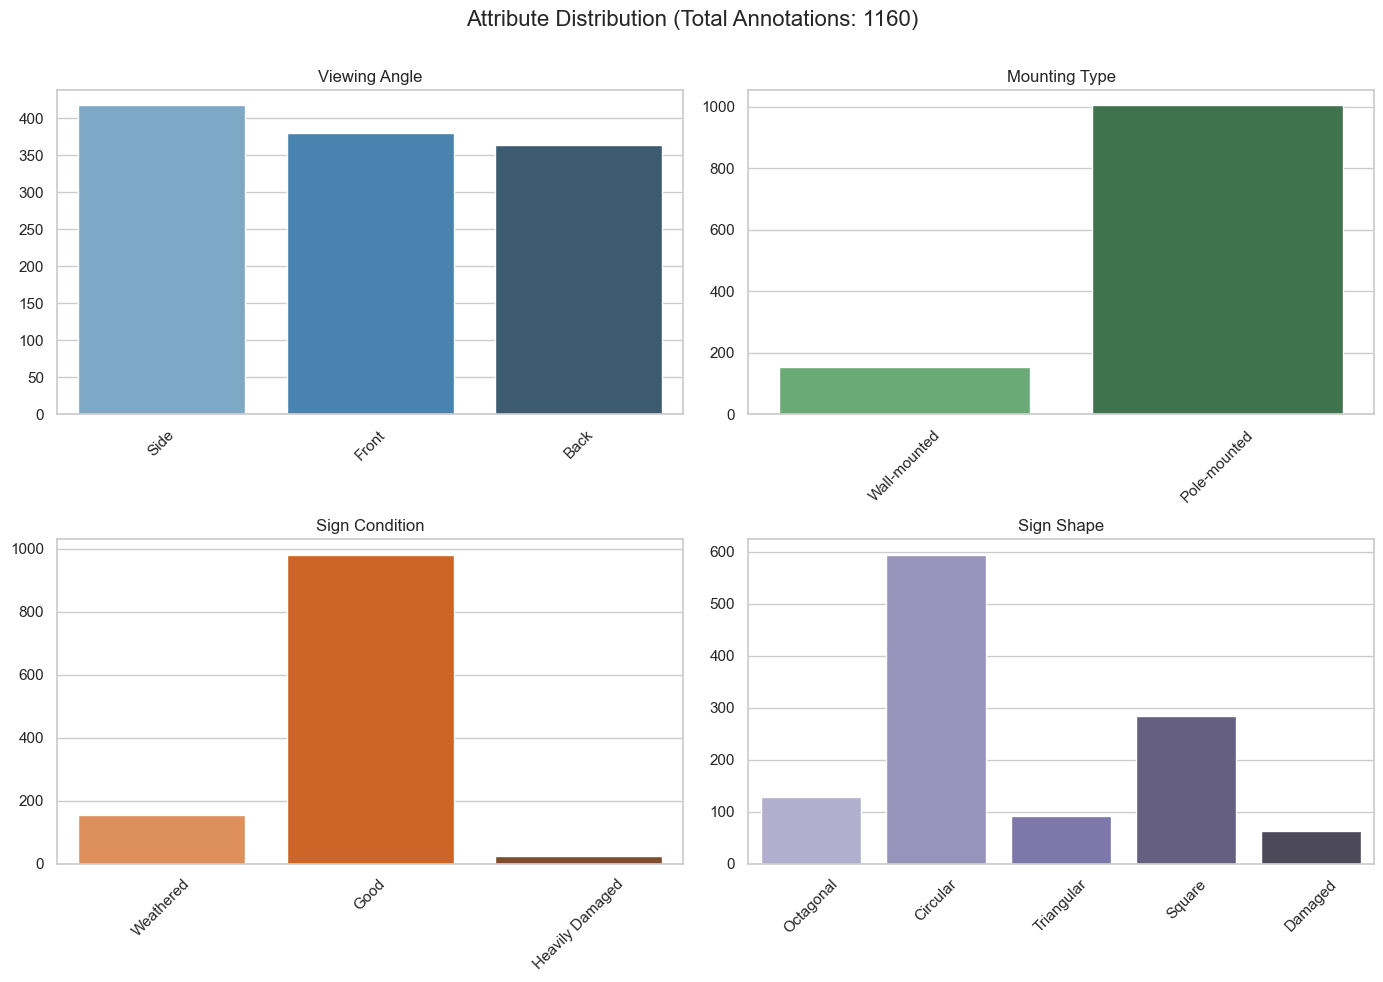

In [22]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialize Counters for all 4 attributes
va_counts = Counter()       # Viewing Angle
mt_counts = Counter()       # Mounting Type
cond_counts = Counter()     # Condition
shape_counts = Counter()    # Sign Shape

# 2. Iterate through ALL splits (Train, Val, Test)
for split_name, coco_obj in coco_sets.items():
    print(f"Processing {split_name}...")
    
    for ann in coco_obj.anns.values():
        attrs = ann.get('attributes', {})
        
        # --- Helper function to handle List vs String ---
        def add_to_counter(key, counter):
            val = attrs.get(key, None)
            if val:
                # If it's a list like ["Back"], extend. If string "Back", append.
                if isinstance(val, list):
                    counter.update(val)
                else:
                    counter[val] += 1

        # --- Extract All Attributes ---
        add_to_counter('view_angle', va_counts)
        add_to_counter('mounting', mt_counts)
        add_to_counter('condition', cond_counts)
        add_to_counter('sign_shape', shape_counts)

# 3. Plotting (2x2 Grid)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f"Attribute Distribution (Total Annotations: {sum(va_counts.values())})", fontsize=16)

# Helper to plot on a specific axis
def plot_bar(counter, ax, title, color_palette="viridis"):
    if counter:
        sns.barplot(x=list(counter.keys()), y=list(counter.values()), ax=ax, palette=color_palette)
        ax.set_title(title)
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.text(0.5, 0.5, "No Data", ha='center')

plot_bar(va_counts, axs[0, 0], "Viewing Angle", "Blues_d")
plot_bar(mt_counts, axs[0, 1], "Mounting Type", "Greens_d")
plot_bar(cond_counts, axs[1, 0], "Sign Condition", "Oranges_d")
plot_bar(shape_counts, axs[1, 1], "Sign Shape", "Purples_d")

plt.tight_layout()
plt.subplots_adjust(top=0.9) # Make room for the main title
plt.show()

## 5. Analysing Bounding Boxes

Extracting bbox data from train...
Extracting bbox data from val...
Extracting bbox data from test...


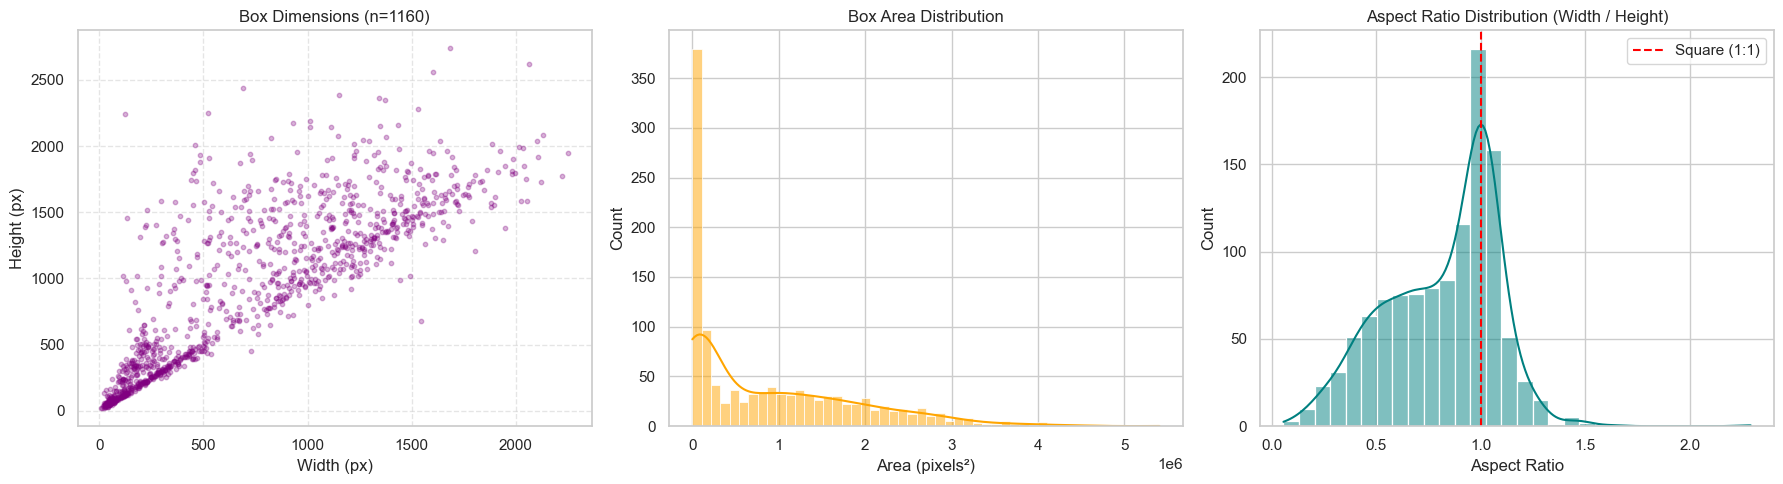

Average Box Size: 701.1 x 880.6 pixels
Median Aspect Ratio: 0.89


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Initialize lists to hold data from ALL splits
widths = []
heights = []
areas = []
aspect_ratios = []

# 2. Iterate through Train, Val, and Test splits
for split_name, coco_obj in coco_sets.items():
    print(f"Extracting bbox data from {split_name}...")
    
    for ann in coco_obj.anns.values():
        # COCO bbox format is [x, y, width, height]
        w, h = ann['bbox'][2], ann['bbox'][3]
        
        # Filter out invalid boxes (sanity check)
        if w > 0 and h > 0:
            widths.append(w)
            heights.append(h)
            areas.append(w * h)
            aspect_ratios.append(w / h)

# 3. Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# --- Plot 1: Width vs Height (Scatter) ---
# This helps identify if signs are mostly square, tall, or wide
axs[0].scatter(widths, heights, alpha=0.3, s=10, color='purple')
axs[0].set_xlabel("Width (px)")
axs[0].set_ylabel("Height (px)")
axs[0].set_title(f"Box Dimensions (n={len(widths)})")
axs[0].grid(True, linestyle='--', alpha=0.5)

# --- Plot 2: Area Distribution (Histogram) ---
# This tells you if you are detecting "Small", "Medium", or "Large" objects
sns.histplot(areas, bins=50, ax=axs[1], color='orange', kde=True)
axs[1].set_title("Box Area Distribution")
axs[1].set_xlabel("Area (pixels²)")

# --- Plot 3: Aspect Ratio (Histogram) ---
# Critical for Anchor Boxes. 1.0 = Square, <1 = Tall, >1 = Wide
sns.histplot(aspect_ratios, bins=30, ax=axs[2], color='teal', kde=True)
axs[2].axvline(x=1.0, color='red', linestyle='--', label="Square (1:1)")
axs[2].set_title("Aspect Ratio Distribution (Width / Height)")
axs[2].set_xlabel("Aspect Ratio")
axs[2].legend()

plt.tight_layout()
plt.show()

# --- Summary Stats ---
print(f"Average Box Size: {np.mean(widths):.1f} x {np.mean(heights):.1f} pixels")
print(f"Median Aspect Ratio: {np.median(aspect_ratios):.2f}")

## 6. Visual Manual Check

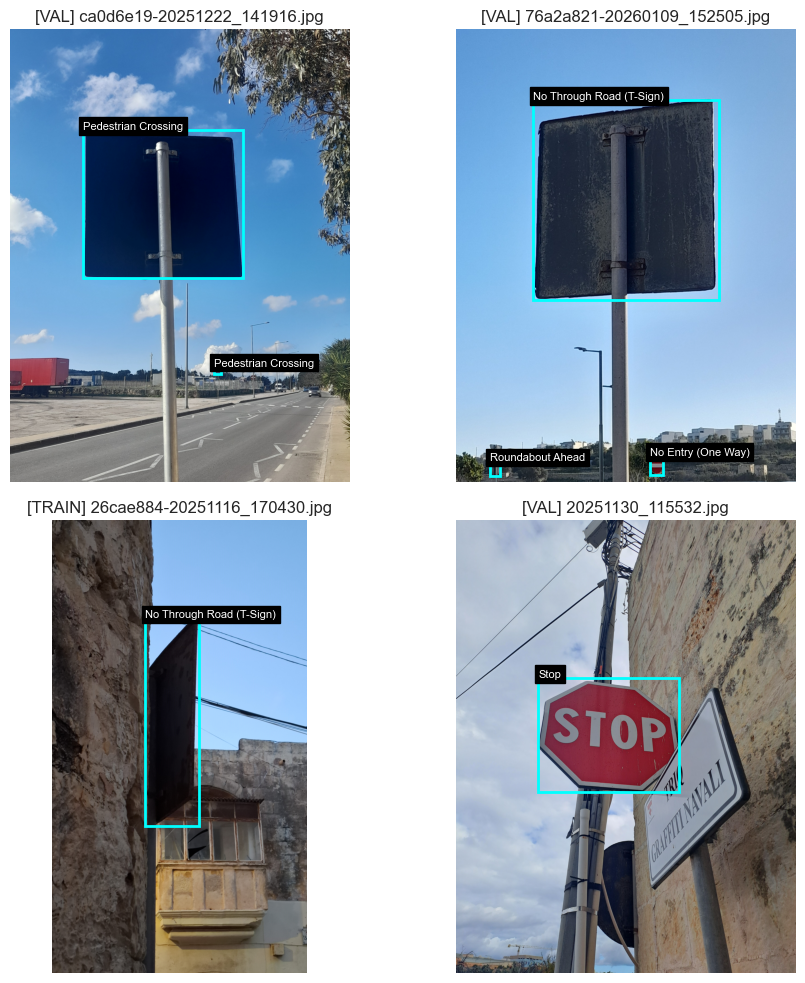

In [24]:
import random
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image, ImageOps

# 1. Define the BASE image directory (Parent folder of train/val/test)
# NOTE: I removed "\train" from the end so we can add it dynamically later
base_img_dir = Path(r"dataset_FULL_COCO\COCO-based_COCO\images")

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for ax in axs.flatten():
    # 2. Pick a random split (train, val, or test) from your dictionary
    split_name = random.choice(list(coco_sets.keys()))
    current_coco = coco_sets[split_name]
    
    # 3. Load Random Image Data from that split
    img_id = random.choice(list(current_coco.imgs.keys()))
    img_data = current_coco.loadImgs(img_id)[0]
    ann_ids = current_coco.getAnnIds(imgIds=img_data['id'])
    anns = current_coco.loadAnns(ann_ids)
    
    # 4. Construct the path: Base + Split Folder + Filename
    # Example: .../images/val/my_image.jpg
    img_path = base_img_dir / split_name / img_data['file_name']
    
    try:
        # 5. Open with PIL and apply EXIF rotation fix
        img_pil = Image.open(img_path)
        img_pil = ImageOps.exif_transpose(img_pil) 
        
        ax.imshow(img_pil)
        
        # 6. Draw Bounding Boxes
        for ann in anns:
            bbox = ann['bbox'] 
            x, y, w, h = bbox
            
            rect = patches.Rectangle(
                (x, y), w, h, 
                linewidth=2, 
                edgecolor='cyan',  # Changed to Cyan for better visibility
                facecolor='none'
            )
            ax.add_patch(rect)
            
            # Optional: Add the class name text
            cat_name = current_coco.loadCats(ann['category_id'])[0]['name']
            ax.text(x, y - 5, cat_name, color='white', backgroundcolor='black', fontsize=8)

        # Title shows which split the image came from
        ax.set_title(f"[{split_name.upper()}] {img_data['file_name']}")
        ax.axis('off')
        
    except FileNotFoundError:
        # Graceful error handling if an image is missing
        ax.text(0.5, 0.5, "File Not Found", ha='center')
        ax.set_title(f"Missing: {img_data['file_name']}")

plt.tight_layout()
plt.show()